In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
import scipy.misc
import cv2

In [46]:
data_dir = "D://LAB//master_thesis//result//4_3//PCB//"
table=pd.read_csv(data_dir+'psnr_result.csv')

In [47]:
table.drop([200],inplace=True)

In [48]:
new_table=table['edsr']-table['bicubic']

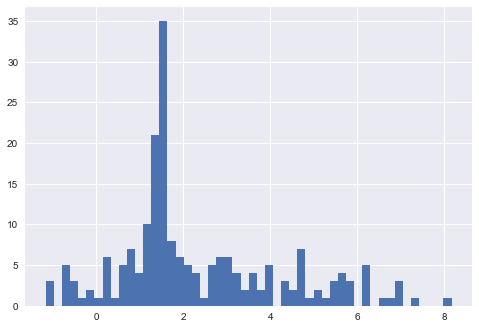

In [49]:
plt.hist(new_table,bins=50)
plt.show()

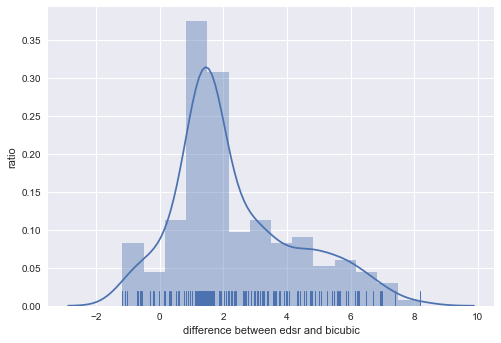

In [50]:
image=sns.distplot(new_table,rug=True)
plt.xlabel("difference between edsr and bicubic")
plt.ylabel("ratio")
fig=image.get_figure()
plt.show()

In [51]:
fig.savefig("hist.png")

In [52]:
new_table

0      2.981148
1      1.497166
2      1.492621
3     -0.558001
4      4.399270
5      1.589583
6      3.362651
7      1.870030
8      1.525237
9      1.504057
10     0.614449
11    -1.163876
12     2.388006
13     2.630965
14     0.829956
15     4.544577
16     1.513537
17     0.186052
18     1.644770
19    -0.164959
20     1.542460
21     2.771770
22     3.905328
23     7.001117
24     5.862581
25     1.324044
26     3.577279
27     1.642181
28     2.657650
29     1.445286
         ...   
170    4.773383
171    1.524343
172    6.957565
173    0.612053
174    1.393422
175    4.341055
176    2.775191
177    6.227830
178   -0.030257
179    1.166736
180    2.230565
181    1.344337
182   -0.686018
183    6.134129
184   -0.297238
185    5.907707
186    1.884896
187    3.749010
188    1.628561
189    0.755429
190    1.369068
191    1.459845
192    3.089517
193    3.657889
194    2.325003
195    6.496212
196    1.407181
197   -0.570299
198    1.589101
199    1.600719
Length: 200, dtype: floa

In [6]:
import os
data_dir="D://LAB//master_thesis//dataset//DATASET-Train-augmented-120"

In [7]:
dataset={}
for item in os.listdir(data_dir):
    img_set=[]
    for files in os.listdir(data_dir+"//"+str(item)):
        for img in os.listdir(data_dir+"//"+str(item)+"//"+str(files)):
            image=scipy.misc.imread(data_dir+"//"+str(item)+"//"+str(files)+"//"+str(img))
            img_set.append(image)
    dataset[item]=img_set
            

In [14]:
save_dir="D://LAB//master_thesis//dataset//new//"

In [17]:
for name in ['PCB']:
    #os.makedirs(save_dir+str(name))
    if name == 'battery':
        for index,img in enumerate(dataset[name]):
            if np.var(img) > 20:
                cv2.imwrite(save_dir+str(name)+"//"+str(index)+".png",img)
    elif name == 'BioStone':
        for index,img in enumerate(dataset[name]):
            if np.var(img) > 80:
                cv2.imwrite(save_dir+str(name)+"//"+str(index)+".png",img)
    elif name == 'PCB':
        for index,img in enumerate(dataset[name]):
            if np.var(img) > 3 and np.mean(img)>35:
                cv2.imwrite(save_dir+str(name)+"//"+str(index)+".png",img)
                
        
        

In [66]:
dataset['battery']

[array([[  0,   0,   0, ...,  61,  80, 109],
        [  0,   0,   0, ...,  69,  96, 121],
        [  0,   0,   0, ...,  83, 110, 146],
        ...,
        [  0,   0,   0, ..., 139, 120,  97],
        [  0,   0,   0, ..., 131, 113,  90],
        [  0,   0,   0, ..., 119, 104,  85]], dtype=uint8),
 array([[135, 177, 230, ..., 112, 116, 137],
        [159, 196, 255, ..., 109, 133, 150],
        [182, 214, 239, ..., 117, 138, 159],
        ...,
        [ 83, 108, 122, ..., 168, 130, 145],
        [ 89, 112, 137, ..., 145, 137, 137],
        [100, 122, 151, ..., 131, 145, 133]], dtype=uint8),
 array([[  0,   0,   0, ..., 114, 101, 100],
        [  0,   0,   0, ..., 110, 102, 107],
        [  0,   0,   0, ..., 106, 107, 107],
        ...,
        [140, 118,  84, ..., 139, 113, 103],
        [123, 101,  86, ..., 120, 103, 101],
        [102,  88,  90, ..., 105,  90, 109]], dtype=uint8),
 array([[111, 140, 156, ..., 128, 130, 137],
        [112, 155, 163, ..., 118, 122, 128],
        [129, 15

In [68]:
for img in dataset['battery']:
    print

82.91479076197093

In [72]:
np.mean(dataset['battery'][0])

49.359791666666666

In [73]:
np.var(dataset['battery'][0])

4472.368813845485

In [108]:
mean_list=[]
variance_list=[]
for img in dataset['PCB']:
    mean_list.append(np.mean(img))
    variance_list.append(np.var(img))

In [109]:
min(mean_list)

30.000486111111112

In [110]:
min(variance_list)

0.5724776041666665

In [133]:
save_dir="D://LAB//master_thesis//dataset//new_MEAN_35_var_3_pcb"
os.makedirs(save_dir)

In [132]:

for index,img in enumerate(dataset['PCB']):
    if np.mean(img) < 35:
        cv2.imwrite(save_dir+"//"+str(index)+".png",img)

In [134]:

for index,img in enumerate(dataset['PCB']):
    if np.mean(img) < 35:
        if np.var(img) < 3:
            cv2.imwrite(save_dir+"//"+str(index)+".png",img)